In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
baseline_data = pd.read_excel('/content/drive/MyDrive/astro assignment/baseline.xlsx',names=['R', 'F'])
baseline3_data = pd.read_excel('/content/drive/MyDrive/astro assignment/baseline0.3.xlsx',names=['R', 'F'])
baseline9_data = pd.read_excel('/content/drive/MyDrive/astro assignment/baseline0.9.xlsx',names=['R', 'F'])
nobreak3_data = pd.read_excel('/content/drive/MyDrive/astro assignment/nobreak0.3.xlsx',names=['R', 'F'])
nobreak67_data = pd.read_excel('/content/drive/MyDrive/astro assignment/nobreak0.67.xlsx',names=['R', 'F'])
nobreak9_data = pd.read_excel('/content/drive/MyDrive/astro assignment/nobreak0.9.xlsx',names=['R', 'F'])
ams_data = pd.read_excel('/content/drive/MyDrive/astro assignment/ams1.xlsx',names=['X', 'XErrorLow', 'XErrorHigh', 'Y', 'YErrorLow', 'YErrorHigh'])

In [ ]:
display(nobreak9_data)

,R,F
0,0.938508,4.195390e-01
1,1.265790,6.627260e-01
2,1.707210,8.431480e-01
3,2.302550,8.578830e-01
4,3.105520,7.082730e-01
5,4.188490,4.986700e-01
6,5.649130,3.129880e-01
7,7.619130,1.808730e-01
8,10.276100,9.840050e-02
9,13.859700,5.132080e-02


In [ ]:
baseline_copy = baseline_data#making copies of the datas sets to not modify the data itself
baseline3_copy = baseline3_data
baseline9_copy = baseline9_data
nobreak3_copy = nobreak3_data
nobreak67_copy = nobreak67_data
nobreak9_copy = nobreak9_data
ams_copy = ams_data

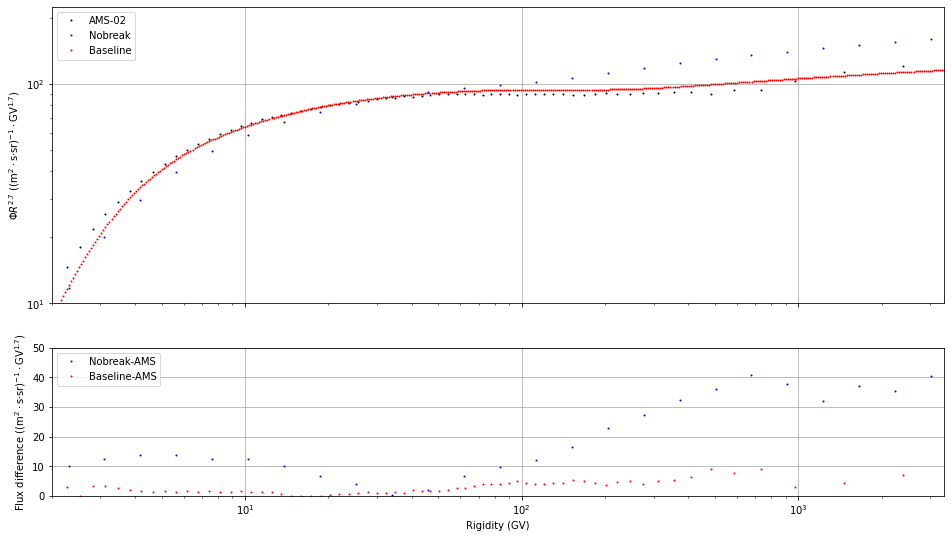

In [ ]:


# Extract the data. Numpy arrays are useful and easy to manipulate
baseline_rigidity = np.array(baseline_copy['R'])
baseline_flux     = np.array(baseline_copy['F'])
# Rescale the flux to R^2.7
baseline_flux_rig = baseline_flux * (baseline_rigidity ** 2.7)


baseline3_rigidity = np.array(baseline3_copy['R'])
baseline3_flux     = np.array(baseline3_copy['F'])
baseline3_flux_rig = baseline3_flux * (baseline3_rigidity ** 2.7)


baseline9_rigidity = np.array(baseline9_copy['R'])
baseline9_flux     = np.array(baseline9_copy['F'])
baseline9_flux_rig = baseline9_flux * (baseline9_rigidity ** 2.7)


nobreak3_rigidity = np.array(nobreak3_copy['R'])
nobreak3_flux     = np.array(nobreak3_copy['F'])
nobreak3_flux_rig = nobreak3_flux * (nobreak3_rigidity ** 2.7)


nobreak67_rigidity = np.array(nobreak67_copy['R'])
nobreak67_flux     = np.array(nobreak67_copy['F'])
nobreak67_flux_rig = nobreak67_flux * (nobreak67_rigidity ** 2.7)


nobreak9_rigidity = np.array(nobreak9_copy['R'])
nobreak9_flux     = np.array(nobreak9_copy['F'])
nobreak9_flux_rig = nobreak9_flux * (nobreak9_rigidity ** 2.7)


ams_rigidity = np.array(ams_copy['X'])
ams_flux     = np.array(ams_copy['Y'])
ams_yerrhigh   = np.array(ams_copy['YErrorHigh'])
ams_yerrlow   = np.array(ams_copy['YErrorLow'])
ams_flux_rig = ams_flux * (ams_rigidity ** 2.7)
ams_yuncertainty = ams_yerrhigh - ams_yerrlow

# Plot the results
a = 2 #size of points
fig, ax = plt.subplots(2,figsize=(16,9), gridspec_kw={'height_ratios': [2, 1]},sharex=True)
ax[0].plot(ams_rigidity, ams_flux_rig, '.', markersize = a, label = 'AMS-02', marker = '.', color = 'black')
ax[0].plot(nobreak67_rigidity, nobreak67_flux_rig, '.', markersize = a, label = 'Nobreak', color = 'blue')
ax[0].plot(baseline_rigidity, baseline_flux_rig, '.', markersize = a, label = 'Baseline', color = 'red')
ax[0].set_ylabel('$\Phi R^{2.7}$ ((m$^2\cdot$s$\cdot$sr)$^{-1}\cdot$GV$^{1.7}$)') #m^{2} s sr GV)^{-1})
ax[0].legend(loc='upper left')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlim(2,15**3)
ax[0].set_ylim(10,15**2)
ax[0].grid('True')



m = np.empty(len(nobreak67_rigidity)) #finding nearest point to calculate the difference
d = 0.25

for i in range(len(nobreak67_rigidity)):
  r = nobreak67_rigidity[i]
  s = (r+r*d)
  t = (r-r*d)
  for j in range(len(ams_rigidity)):
    p = ams_rigidity[j]
    if p <= s:
      if p >= t:
        x = abs(r-p)
        q = ams_yerrhigh[i]+ams_yerrlow[i]
        m[i] = abs(ams_flux_rig[j]-nobreak67_flux_rig[i])


n = np.empty(len(ams_rigidity))
d = 0.0083
k = 1
for i in range(len(ams_rigidity)):
  r = ams_rigidity[i]
  s = (r+r*d)
  t = (r-r*d)
  for j in range(len(baseline_rigidity)):
    p = baseline_rigidity[j]
    if p <= s:
      if p >= t:
        x = abs(r-p)
        n[i] = abs(ams_flux_rig[i]-baseline_flux_rig[j])



# Plot the results
ax[1].plot(nobreak67_rigidity, m, '.', markersize = a, label = 'Nobreak-AMS', color = 'blue')
ax[1].plot(ams_rigidity, n, '.', markersize = a, label = 'Baseline-AMS', color = 'red')
ax[1].legend(loc='upper left')
ax[1].set_xlabel('Rigidity (GV)')
ax[1].set_ylim(0,50)
ax[1].set_ylabel('Flux difference ((m$^2\cdot$s$\cdot$sr)$^{-1}\cdot$GV$^{1.7}$)') #m^{2} s sr GV)^{-1})
ax[1].grid('True')

fig.savefig('plot.png')


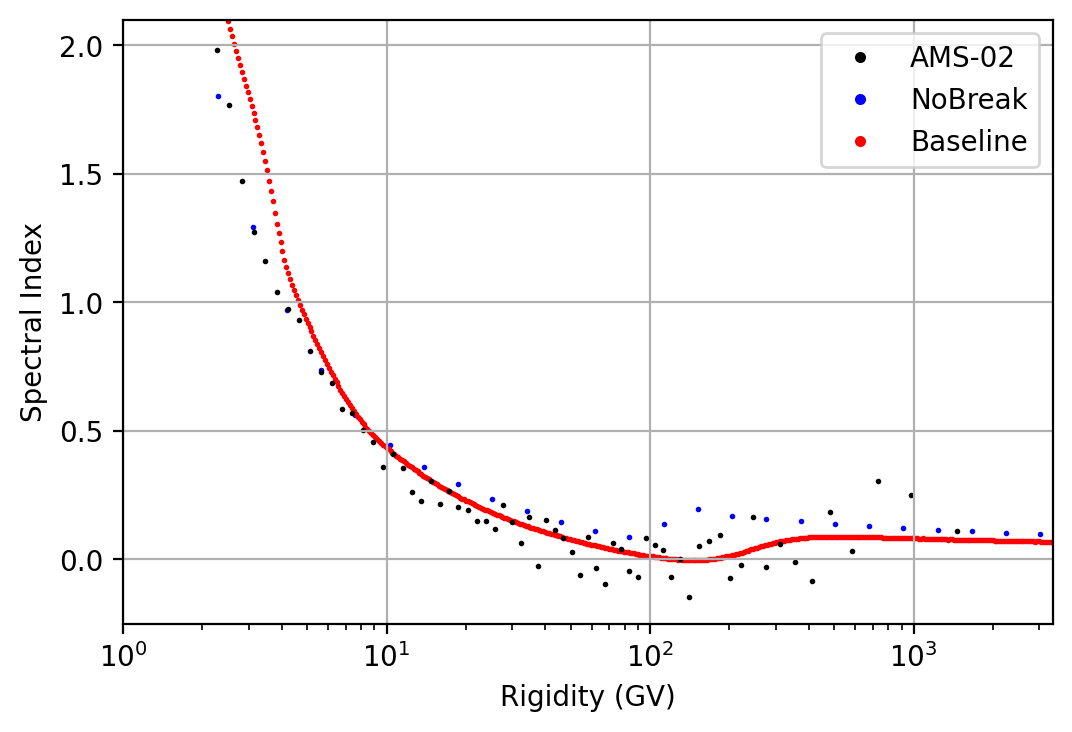

In [ ]:
def spec_index(rig,flux,color): #defining function to calculate the spectral index and plot it
  spectral_index = []
  for i in range(0,len(flux)-1):
    spectral_value = (np.log(flux[i+1])-np.log(flux[i]))/(np.log(rig[i+1])-np.log(rig[i]))
    spectral_index = np.append(spectral_index, [spectral_value])
    plt.scatter(rig[i],spectral_value, color=color, s = 1)
  return spectral_index

plot = plt.figure(dpi=200)
spectral_ind_nobreak = spec_index(nobreak67_rigidity, nobreak67_flux_rig,'blue')
spectral_ind_baseline = spec_index(baseline_rigidity, baseline_flux_rig, 'red')
spectral_ind_ams = spec_index(ams_rigidity, ams_flux_rig,'black')

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='.', color='w', label='AMS-02',
                          markerfacecolor='black', markersize=10),
                   Line2D([0], [0], marker='.', color='w', label='NoBreak',
                          markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], marker='.', color='w', label='Baseline',
                          markerfacecolor='red', markersize=10)] #makeing a custom legend

#Plotting
plt.legend(handles=legend_elements, loc='upper right')
plt.xlim(1,15**3)
plt.ylim(-0.25,2.1,0.25)
plt.xscale('log')
plt.xlabel('Rigidity (GV)')
plt.ylabel('Spectral Index')
plt.grid('True')
plt.show()
plot.savefig('spectral_index.png')